# Exploratory Data Analysis (EDA)

### **Objective:**
Perform comprehensive exploratory data analysis while leveraging the structured modules for consistency and reproducibility.


In [1]:
import sys
sys.path.append('../src')
from data_processing import DataProcessor
from config import DATA_PATHS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Initialize data processor and load data
processor = DataProcessor()
df = processor.load_data()

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Source: {DATA_PATHS['raw_train']}")

Dataset loaded successfully!
Shape: (1460, 81)
Source: e:\Projects_3\Data Science\Regression\Housing Prices_2\data\raw\train.csv


## **1. Missing Values Analysis Using DataProcessor**

In [5]:
# Use the DataProcessor's missing value analysis method
missing_summary = processor.get_missing_value_summary(df)

print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
print(f"Total columns with missing values: {len(missing_summary)}")
print("-" * 50)
# Display missing values in a formatted way
for col, percentage in missing_summary.items():
    print(f"{col:<20}: {percentage:>6.2f}%")

MISSING VALUES ANALYSIS
Total columns with missing values: 19
--------------------------------------------------
PoolQC              :  99.52%
MiscFeature         :  96.30%
Alley               :  93.77%
Fence               :  80.75%
MasVnrType          :  59.73%
FireplaceQu         :  47.26%
LotFrontage         :  17.74%
GarageQual          :   5.55%
GarageFinish        :   5.55%
GarageType          :   5.55%
GarageYrBlt         :   5.55%
GarageCond          :   5.55%
BsmtFinType2        :   2.60%
BsmtExposure        :   2.60%
BsmtCond            :   2.53%
BsmtQual            :   2.53%
BsmtFinType1        :   2.53%
MasVnrArea          :   0.55%
Electrical          :   0.07%


In [6]:
print("\n" + "=" * 50)
print("KEY INSIGHTS:")
print("=" * 50)
# Categorize missing values by type
structural_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

print("Structural Missing Values (Feature Absence):")
for col in structural_missing:
    if col in missing_summary:
        print(f"  - {col}: {missing_summary[col]:.2f}%")


KEY INSIGHTS:
Structural Missing Values (Feature Absence):
  - PoolQC: 99.52%
  - MiscFeature: 96.30%
  - Alley: 93.77%
  - Fence: 80.75%
  - FireplaceQu: 47.26%
  - GarageType: 5.55%
  - GarageFinish: 5.55%
  - GarageQual: 5.55%
  - GarageCond: 5.55%
  - BsmtQual: 2.53%
  - BsmtCond: 2.53%
  - BsmtExposure: 2.60%
  - BsmtFinType1: 2.53%
  - BsmtFinType2: 2.60%


In [7]:
print("\nTrue Missing Values (Data Issues):")
true_missing = [col for col in missing_summary.keys() if col not in structural_missing]
for col in true_missing:
    print(f"  - {col}: {missing_summary[col]:.2f}%")


True Missing Values (Data Issues):
  - MasVnrType: 59.73%
  - LotFrontage: 17.74%
  - GarageYrBlt: 5.55%
  - MasVnrArea: 0.55%
  - Electrical: 0.07%


## **2. Target Variable Analysis - SalePrice**

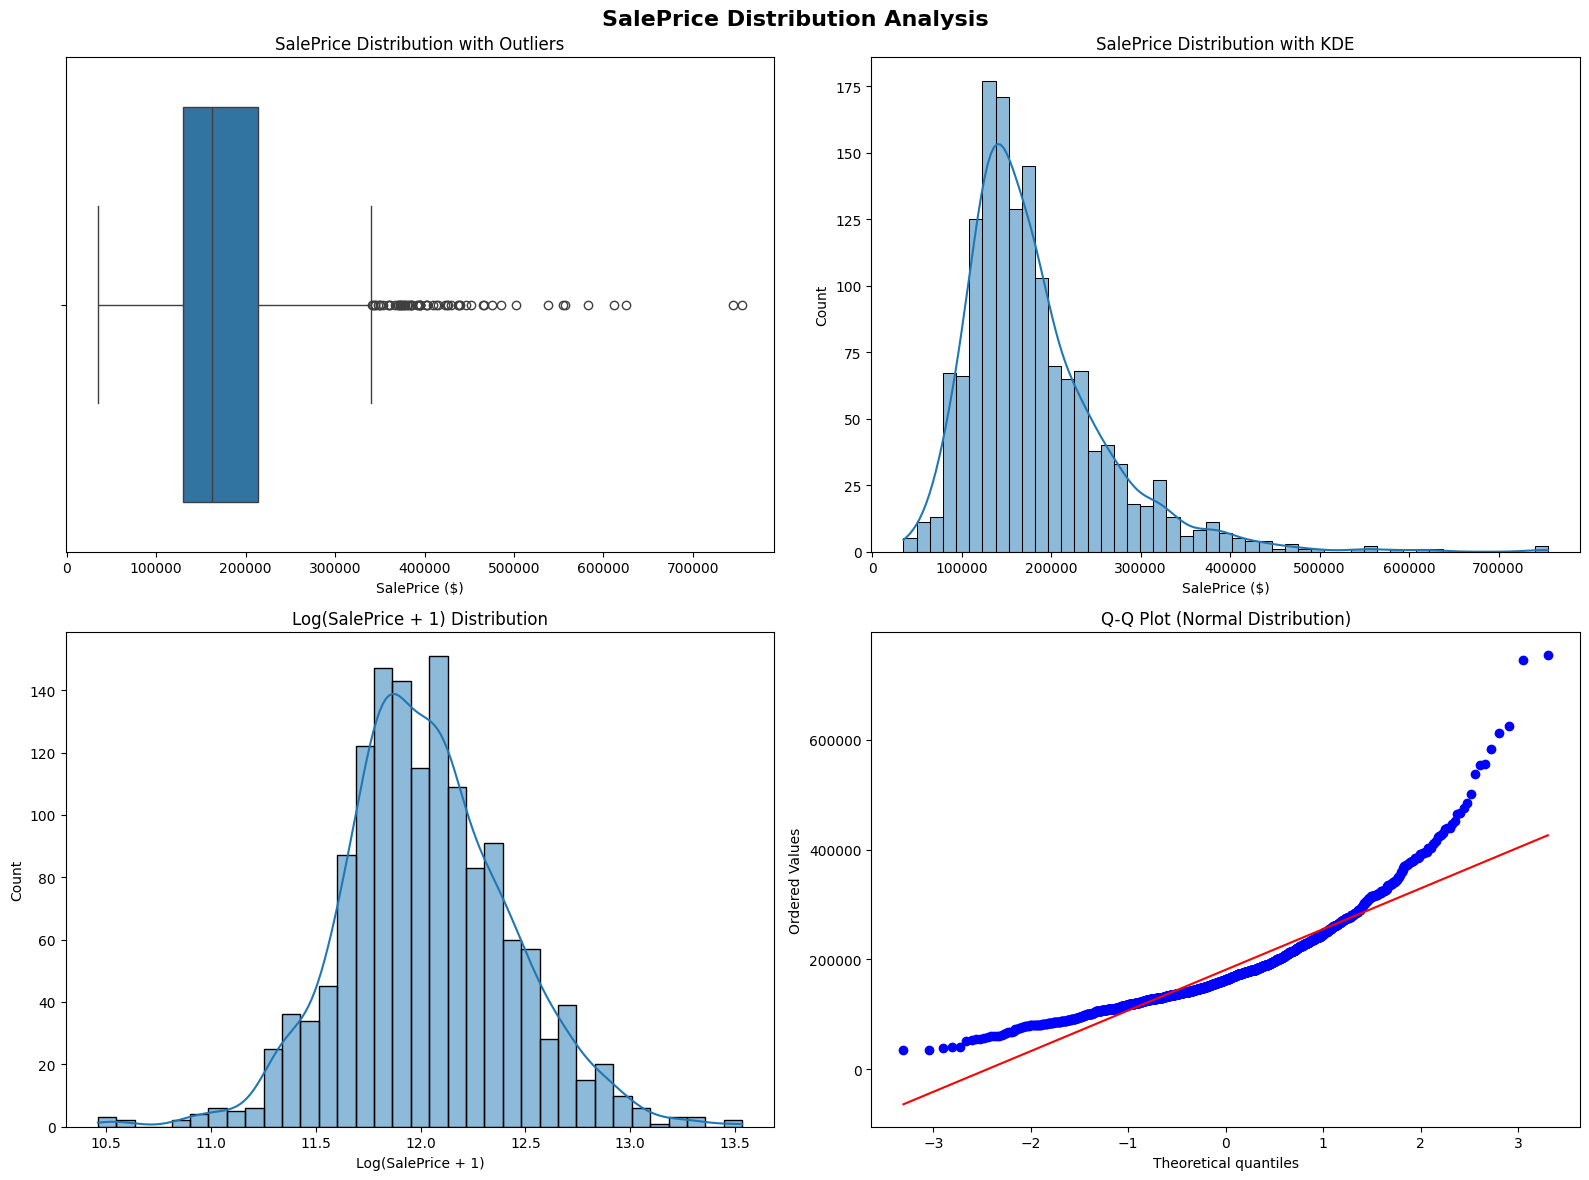

In [8]:
# Create comprehensive analysis of the target variable
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SalePrice Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Boxplot for outlier detection
sns.boxplot(x=df['SalePrice'], ax=axes[0, 0])
axes[0, 0].set_title('SalePrice Distribution with Outliers')
axes[0, 0].set_xlabel('SalePrice ($)')

# 2. Histogram with KDE
sns.histplot(df['SalePrice'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('SalePrice Distribution with KDE')
axes[0, 1].set_xlabel('SalePrice ($)')

# 3. Log-transformed distribution
log_prices = np.log1p(df['SalePrice'])
sns.histplot(log_prices, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log(SalePrice + 1) Distribution')
axes[1, 0].set_xlabel('Log(SalePrice + 1)')

# 4. Q-Q plot for normality check
from scipy import stats
stats.probplot(df['SalePrice'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normal Distribution)')

plt.tight_layout()
plt.show()

In [9]:
# Statistical summary
print("=" * 50)
print("SALEPRICE STATISTICAL SUMMARY")
print("=" * 50)
print(f"Mean: ${df['SalePrice'].mean():,.2f}")
print(f"Median: ${df['SalePrice'].median():,.2f}")
print(f"Std Dev: ${df['SalePrice'].std():,.2f}")
print(f"Skewness: {df['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df['SalePrice'].kurtosis():.4f}")
print(f"Min: ${df['SalePrice'].min():,.2f}")
print(f"Max: ${df['SalePrice'].max():,.2f}")
print(f"Range: ${df['SalePrice'].max() - df['SalePrice'].min():,.2f}")

print(f"\nLog-transformed skewness: {log_prices.skew():.4f}")
print("Recommendation: Log transformation reduces skewness significantly")

SALEPRICE STATISTICAL SUMMARY
Mean: $180,921.20
Median: $163,000.00
Std Dev: $79,442.50
Skewness: 1.8829
Kurtosis: 6.5363
Min: $34,900.00
Max: $755,000.00
Range: $720,100.00

Log-transformed skewness: 0.1213
Recommendation: Log transformation reduces skewness significantly


## **3. Key Feature Analysis - GrLivArea**

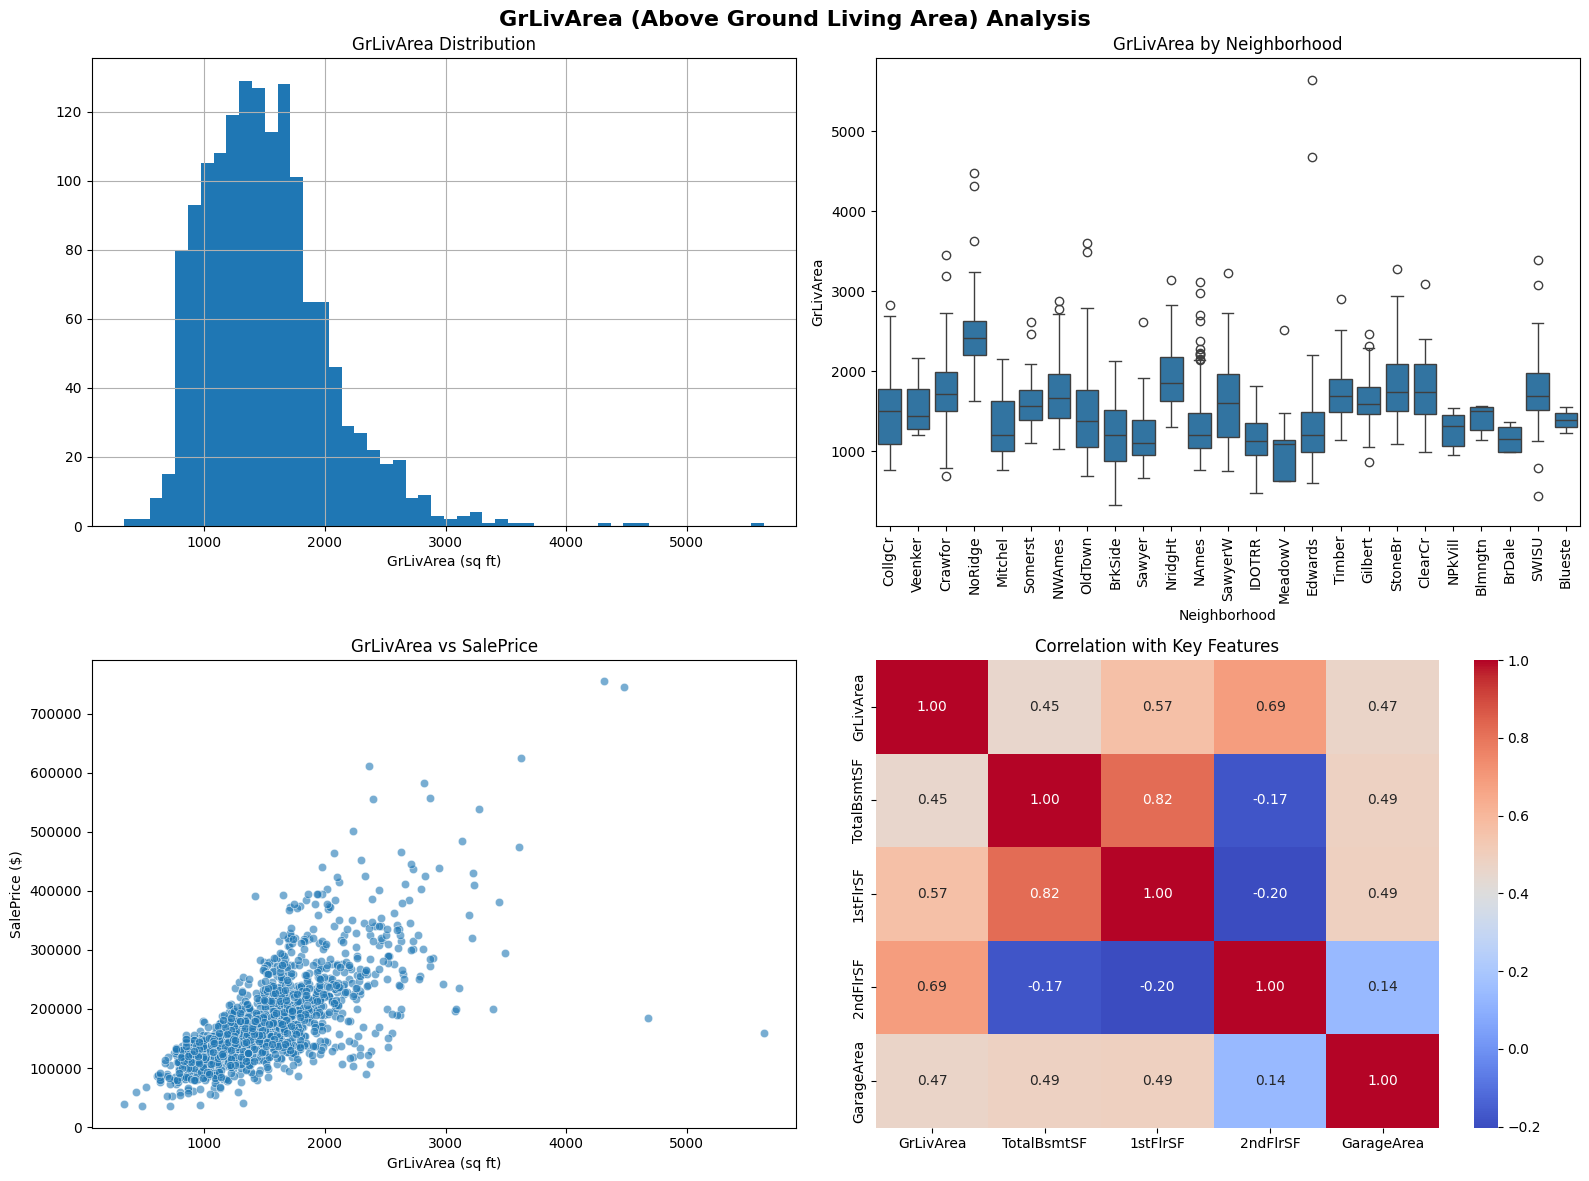

In [10]:
# Comprehensive analysis of the most important numerical feature
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('GrLivArea (Above Ground Living Area) Analysis', fontsize=16, fontweight='bold')

# 1. Distribution histogram
df['GrLivArea'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('GrLivArea Distribution')
axes[0, 0].set_xlabel('GrLivArea (sq ft)')

# 2. Boxplot by Neighborhood
sns.boxplot(x='Neighborhood', y='GrLivArea', data=df, ax=axes[0, 1])
axes[0, 1].set_title('GrLivArea by Neighborhood')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Scatter plot with SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('GrLivArea vs SalePrice')
axes[1, 0].set_xlabel('GrLivArea (sq ft)')
axes[1, 0].set_ylabel('SalePrice ($)')

# 4. Correlation with other key features
key_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']
correlation_data = df[key_features].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation with Key Features')

plt.tight_layout()
plt.show()

In [11]:
# Statistical analysis
print("=" * 50)
print("GR LIV AREA STATISTICAL SUMMARY")
print("=" * 50)
print(f"Mean: {df['GrLivArea'].mean():.2f} sq ft")
print(f"Median: {df['GrLivArea'].median():.2f} sq ft")
print(f"Std Dev: {df['GrLivArea'].std():.2f} sq ft")
print(f"Min: {df['GrLivArea'].min():.2f} sq ft")
print(f"Max: {df['GrLivArea'].max():.2f} sq ft")

GR LIV AREA STATISTICAL SUMMARY
Mean: 1515.46 sq ft
Median: 1464.00 sq ft
Std Dev: 525.48 sq ft
Min: 334.00 sq ft
Max: 5642.00 sq ft


In [12]:
# Correlation with SalePrice
correlation = df['GrLivArea'].corr(df['SalePrice'])
print(f"\nCorrelation with SalePrice: {correlation:.4f}")


Correlation with SalePrice: 0.7086


In [13]:
# Identify outliers (beyond 3 standard deviations)
mean_area = df['GrLivArea'].mean()
std_area = df['GrLivArea'].std()
outliers = df[df['GrLivArea'] > mean_area + 3 * std_area]
print(f"Outliers (> 3 std): {len(outliers)} properties")
print(f"Outlier threshold: {mean_area + 3 * std_area:.2f} sq ft")

Outliers (> 3 std): 16 properties
Outlier threshold: 3091.90 sq ft


## **4. Correlation Analysis**

In [14]:
# Comprehensive correlation analysis of numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Get correlations with SalePrice
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

In [15]:
print("=" * 50)
print("TOP 15 FEATURES CORRELATED WITH SALEPRICE")
print("=" * 50)
for i, (feature, corr) in enumerate(saleprice_corr.head(16).items()):  # Include SalePrice itself
    if feature != 'SalePrice':
        print(f"{i:2d}. {feature:<20}: {corr:.4f}")

TOP 15 FEATURES CORRELATED WITH SALEPRICE
 1. OverallQual         : 0.7910
 2. GrLivArea           : 0.7086
 3. GarageCars          : 0.6404
 4. GarageArea          : 0.6234
 5. TotalBsmtSF         : 0.6136
 6. 1stFlrSF            : 0.6059
 7. FullBath            : 0.5607
 8. TotRmsAbvGrd        : 0.5337
 9. YearBuilt           : 0.5229
10. YearRemodAdd        : 0.5071
11. GarageYrBlt         : 0.4864
12. MasVnrArea          : 0.4775
13. Fireplaces          : 0.4669
14. BsmtFinSF1          : 0.3864
15. LotFrontage         : 0.3518


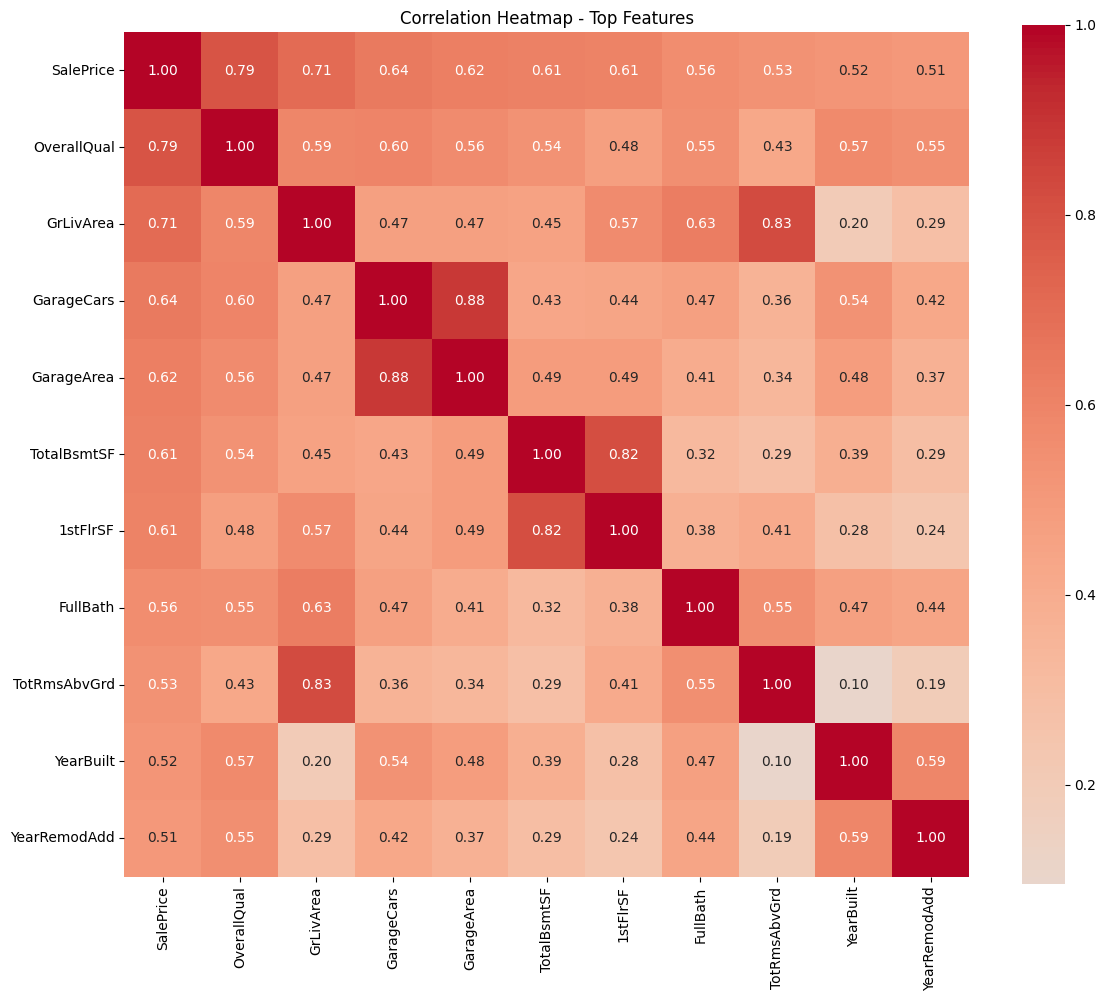

In [16]:
# Create correlation heatmap for top features
top_features = saleprice_corr.head(11).index.tolist()  # Top 10 + SalePrice
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df[top_features].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", 
            center=0, square=True)
plt.title('Correlation Heatmap - Top Features')
plt.tight_layout()
plt.show()

In [17]:
# Find highly correlated feature pairs (potential multicollinearity)
print("\n" + "=" * 50)
print("HIGHLY CORRELATED FEATURE PAIRS (> 0.8)")
print("=" * 50)

# Find pairs with correlation > 0.8 (excluding self-correlations)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = abs(corr_matrix.iloc[i, j])
        if corr_val > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

# Sort and display
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1:<20} <-> {feat2:<20}: {corr:.4f}")


HIGHLY CORRELATED FEATURE PAIRS (> 0.8)
GarageCars           <-> GarageArea          : 0.8825
YearBuilt            <-> GarageYrBlt         : 0.8257
GrLivArea            <-> TotRmsAbvGrd        : 0.8255
TotalBsmtSF          <-> 1stFlrSF            : 0.8195


## **5. Categorical Feature Analysis - Neighborhood**

<Figure size 1600x800 with 0 Axes>

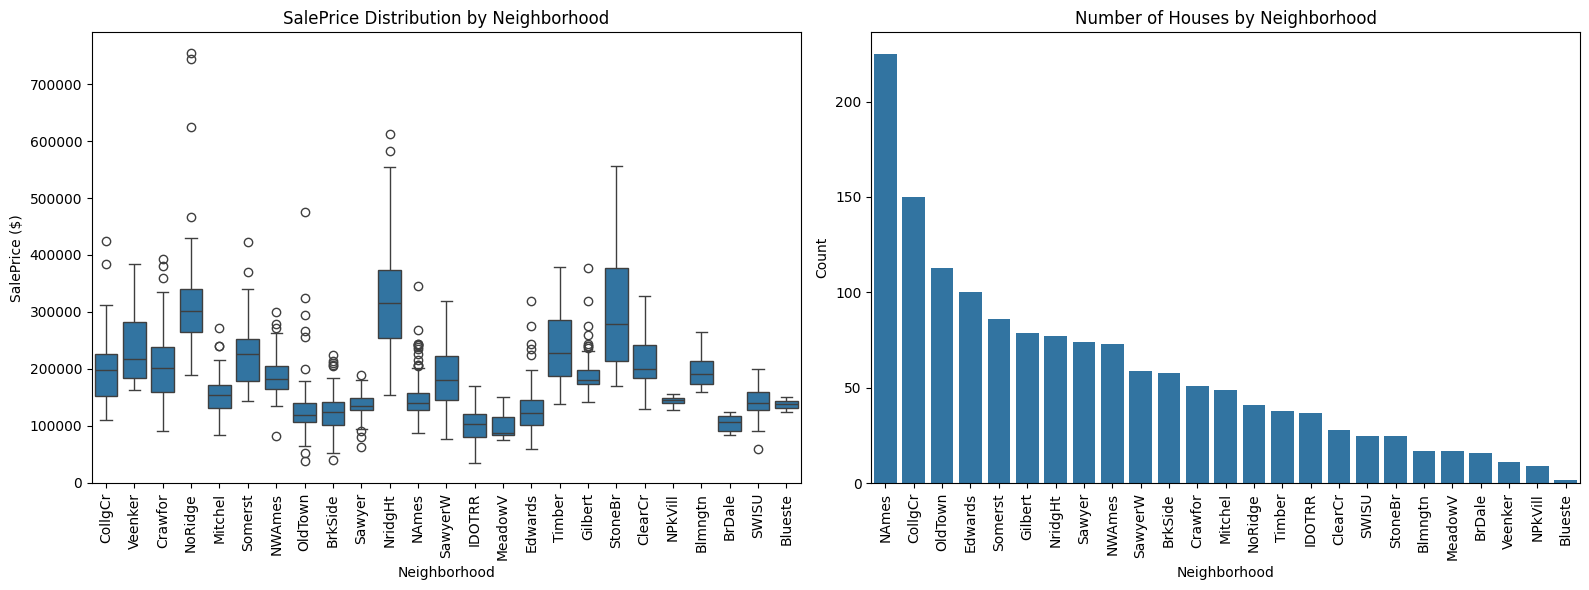

In [18]:
# Neighborhood analysis - key categorical feature
plt.figure(figsize=(16, 8))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for price distribution by neighborhood
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=axes[0])
axes[0].set_title('SalePrice Distribution by Neighborhood')
axes[0].set_xlabel('Neighborhood')
axes[0].set_ylabel('SalePrice ($)')
axes[0].tick_params(axis='x', rotation=90)

# Count plot for number of houses by neighborhood
neighborhood_counts = df['Neighborhood'].value_counts()
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, ax=axes[1])
axes[1].set_title('Number of Houses by Neighborhood')
axes[1].set_xlabel('Neighborhood')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [19]:
# Statistical analysis by neighborhood
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean', 'median', 'std']).round(2)
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)

print("=" * 50)
print("NEIGHBORHOOD ANALYSIS (Sorted by Mean Price)")
print("=" * 50)
print(neighborhood_stats)

# Price range analysis
print(f"\nPrice Range Analysis:")
print(f"Highest mean price: ${neighborhood_stats['mean'].max():,.2f} ({neighborhood_stats['mean'].idxmax()})")
print(f"Lowest mean price: ${neighborhood_stats['mean'].min():,.2f} ({neighborhood_stats['mean'].idxmin()})")
print(f"Price ratio: {neighborhood_stats['mean'].max() / neighborhood_stats['mean'].min():.2f}x")

NEIGHBORHOOD ANALYSIS (Sorted by Mean Price)
              count       mean    median        std
Neighborhood                                       
NoRidge          41  335295.32  301500.0  121412.66
NridgHt          77  316270.62  315000.0   96392.54
StoneBr          25  310499.00  278000.0  112969.68
Timber           38  242247.45  228475.0   64845.65
Veenker          11  238772.73  218000.0   72369.32
Somerst          86  225379.84  225500.0   56177.56
ClearCr          28  212565.43  200250.0   50231.54
Crawfor          51  210624.73  200624.0   68866.40
CollgCr         150  197965.77  197200.0   51403.67
Blmngtn          17  194870.88  191000.0   30393.23
Gilbert          79  192854.51  181000.0   35986.78
NWAmes           73  189050.07  182900.0   37172.22
SawyerW          59  186555.80  179900.0   55652.00
Mitchel          49  156270.12  153500.0   36486.63
NAmes           225  145847.08  140000.0   33075.35
NPkVill           9  142694.44  146000.0    9377.31
SWISU            25

## **6. Quality Features Analysis**

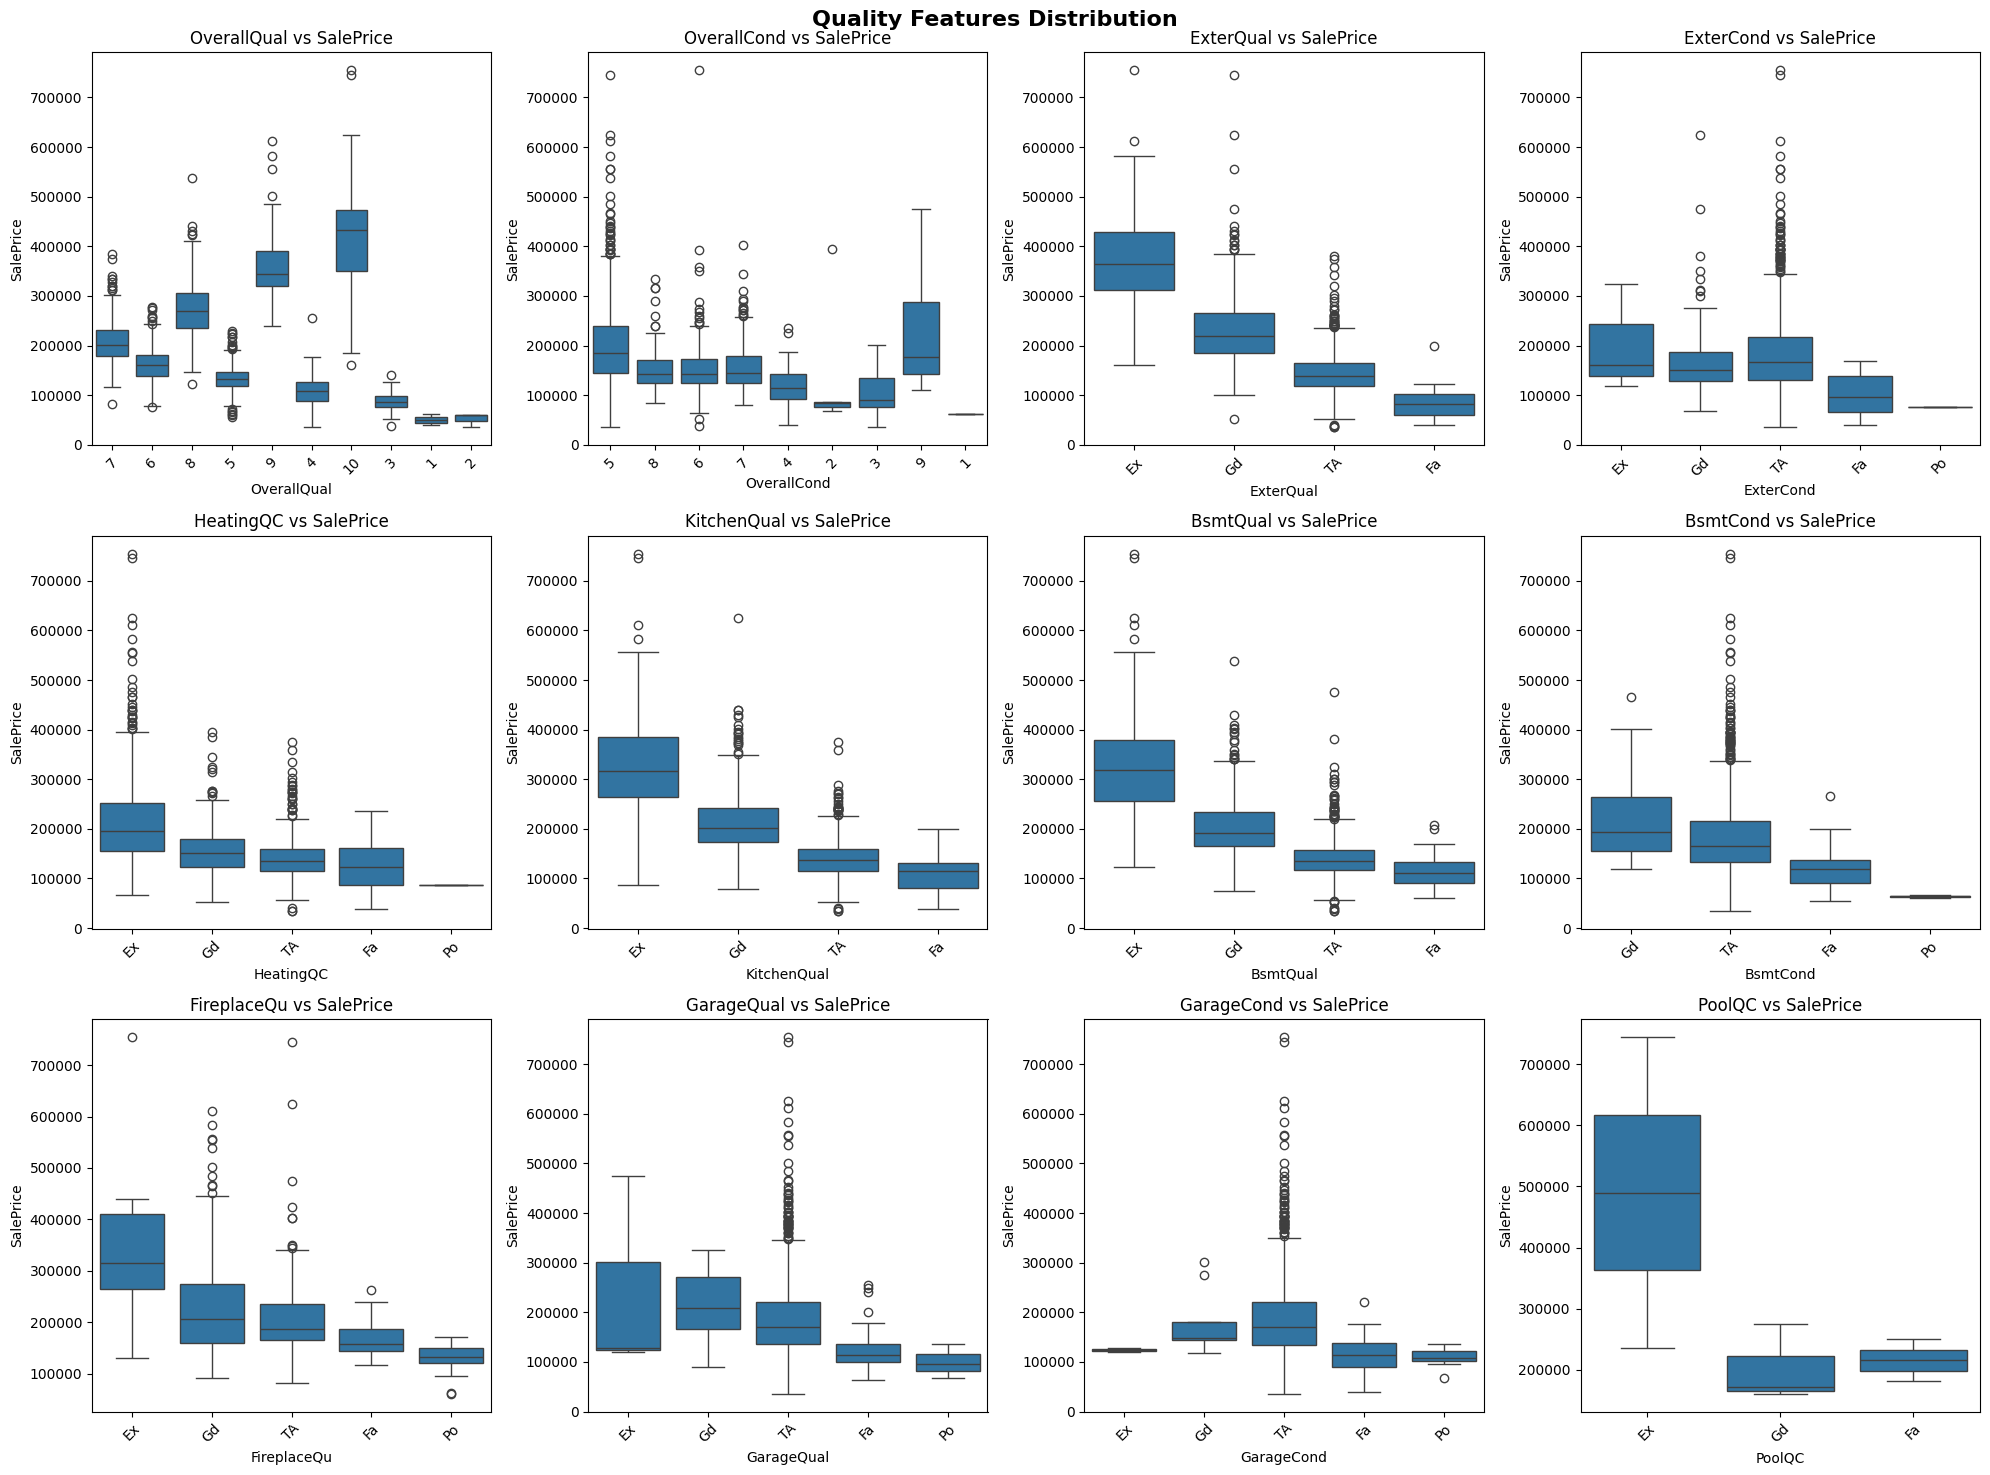

In [20]:
# Analyze ordinal quality features using config mappings
from config import QUALITY_MAPPING

quality_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                    'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond',
                    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Quality Features Distribution', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, feature in enumerate(quality_features):
    if feature in df.columns:
        # Create ordered boxplot
        order = sorted(df[feature].dropna().unique(), 
                        key=lambda x: QUALITY_MAPPING.get(x, 0), reverse=True)
        sns.boxplot(x=feature, y='SalePrice', data=df, ax=axes[i], order=order)
        axes[i].set_title(f'{feature} vs SalePrice')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f'{feature}\n(Not in dataset)', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{feature} (Missing)')

plt.tight_layout()
plt.show()

In [21]:
# Quality correlations analysis
quality_correlations = {}
for feature in quality_features:
    if feature in df.columns:
        # Map to numerical values
        mapped_values = df[feature].map(QUALITY_MAPPING)
        correlation = mapped_values.corr(df['SalePrice'])
        quality_correlations[feature] = correlation

print("=" * 50)
print("QUALITY FEATURES CORRELATION WITH SALEPRICE")
print("=" * 50)
sorted_quality_corr = sorted(quality_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, corr in sorted_quality_corr:
    print(f"{feature:<15}: {corr:+.4f}")

print(f"\nInsight: Quality features are strong predictors of house prices")

QUALITY FEATURES CORRELATION WITH SALEPRICE
OverallQual    : +nan
OverallCond    : +nan
ExterQual      : +0.6826
KitchenQual    : +0.6596
BsmtQual       : +0.6440
PoolQC         : +0.4479
HeatingQC      : +0.4276
FireplaceQu    : +0.2958
BsmtCond       : +0.1607
GarageQual     : +0.1567
GarageCond     : +0.1250
ExterCond      : +0.0189

Insight: Quality features are strong predictors of house prices


## **8. Summary and Key Insights**

In [25]:
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

# Key statistics summary
print("\n📊 DATASET OVERVIEW:")
print(f"  Total Properties: {len(df):,}")
print(f"  Total Features: {df.shape[1]}")
print(f"  Target Variable: SalePrice")
print(f"  Price Range: ${df['SalePrice'].min():,.0f} - ${df['SalePrice'].max():,.0f}")

print("\n🎯 KEY FINDINGS:")

# Top correlated features
top_features = saleprice_corr.head(6).index.tolist()
print("  Top Predictors of SalePrice:")
for i, feature in enumerate(top_features[1:6], 1):  # Skip SalePrice itself
    print(f"    {i}. {feature}: {saleprice_corr[feature]:.4f}")

# Missing values insights
print(f"\n❌ MISSING VALUES:")
print(f"  Columns with missing data: {len(missing_summary)}")
print(f"  Structural missing (features): {len([col for col in structural_missing if col in missing_summary])}")
print(f"  True missing (data issues): {len(true_missing)}")

# Target variable insights
print(f"\n💰 TARGET VARIABLE (SalePrice):")
print(f"  Distribution: Right-skewed (skewness = {df['SalePrice'].skew():.2f})")
print(f"  Recommendation: Log transformation for modeling")

# Multicollinearity concerns
print(f"\n⚠️  MULTICOLLINEARITY:")
print(f"  Highly correlated pairs (>0.8): {len(high_corr_pairs)}")
print(f"  Example: {high_corr_pairs[0][0]} <-> {high_corr_pairs[0][1]}")

print(f"\n🏘️  NEIGHBORHOOD INSIGHTS:")
print(f"  Most expensive: {neighborhood_stats.index[0]} (${neighborhood_stats.iloc[0]['mean']:,.0f})")
print(f"  Least expensive: {neighborhood_stats.index[-1]} (${neighborhood_stats.iloc[-1]['mean']:,.0f})")
print(f"  Price variation: {neighborhood_stats['mean'].max() / neighborhood_stats['mean'].min():.1f}x")

print(f"\n🔧 RECOMMENDATIONS FOR MODELING:")
print("   1. Use log transformation for SalePrice")
print("   2. Handle structural missing values appropriately")
print("   3. Consider regularization for multicollinearity")
print("   4. Include neighborhood as key categorical feature")
print("   5. Feature engineering should focus on quality ratings")

print("\n" + "=" * 60)
print("EDA COMPLETE - Ready for Data Processing!")
print("=" * 60)

EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
  Total Properties: 1,460
  Total Features: 81
  Target Variable: SalePrice
  Price Range: $34,900 - $755,000

🎯 KEY FINDINGS:
  Top Predictors of SalePrice:
    1. OverallQual: 0.7910
    2. GrLivArea: 0.7086
    3. GarageCars: 0.6404
    4. GarageArea: 0.6234
    5. TotalBsmtSF: 0.6136

❌ MISSING VALUES:
  Columns with missing data: 19
  Structural missing (features): 14
  True missing (data issues): 5

💰 TARGET VARIABLE (SalePrice):
  Distribution: Right-skewed (skewness = 1.88)
  Recommendation: Log transformation for modeling

⚠️  MULTICOLLINEARITY:
  Highly correlated pairs (>0.8): 4
  Example: GarageCars <-> GarageArea

🏘️  NEIGHBORHOOD INSIGHTS:
  Most expensive: NoRidge ($335,295)
  Least expensive: MeadowV ($98,576)
  Price variation: 3.4x

🔧 RECOMMENDATIONS FOR MODELING:
   1. Use log transformation for SalePrice
   2. Handle structural missing values appropriately
   3. Consider regularization for multicollinearity
   4

## **7. Time-Based Features Analysis**

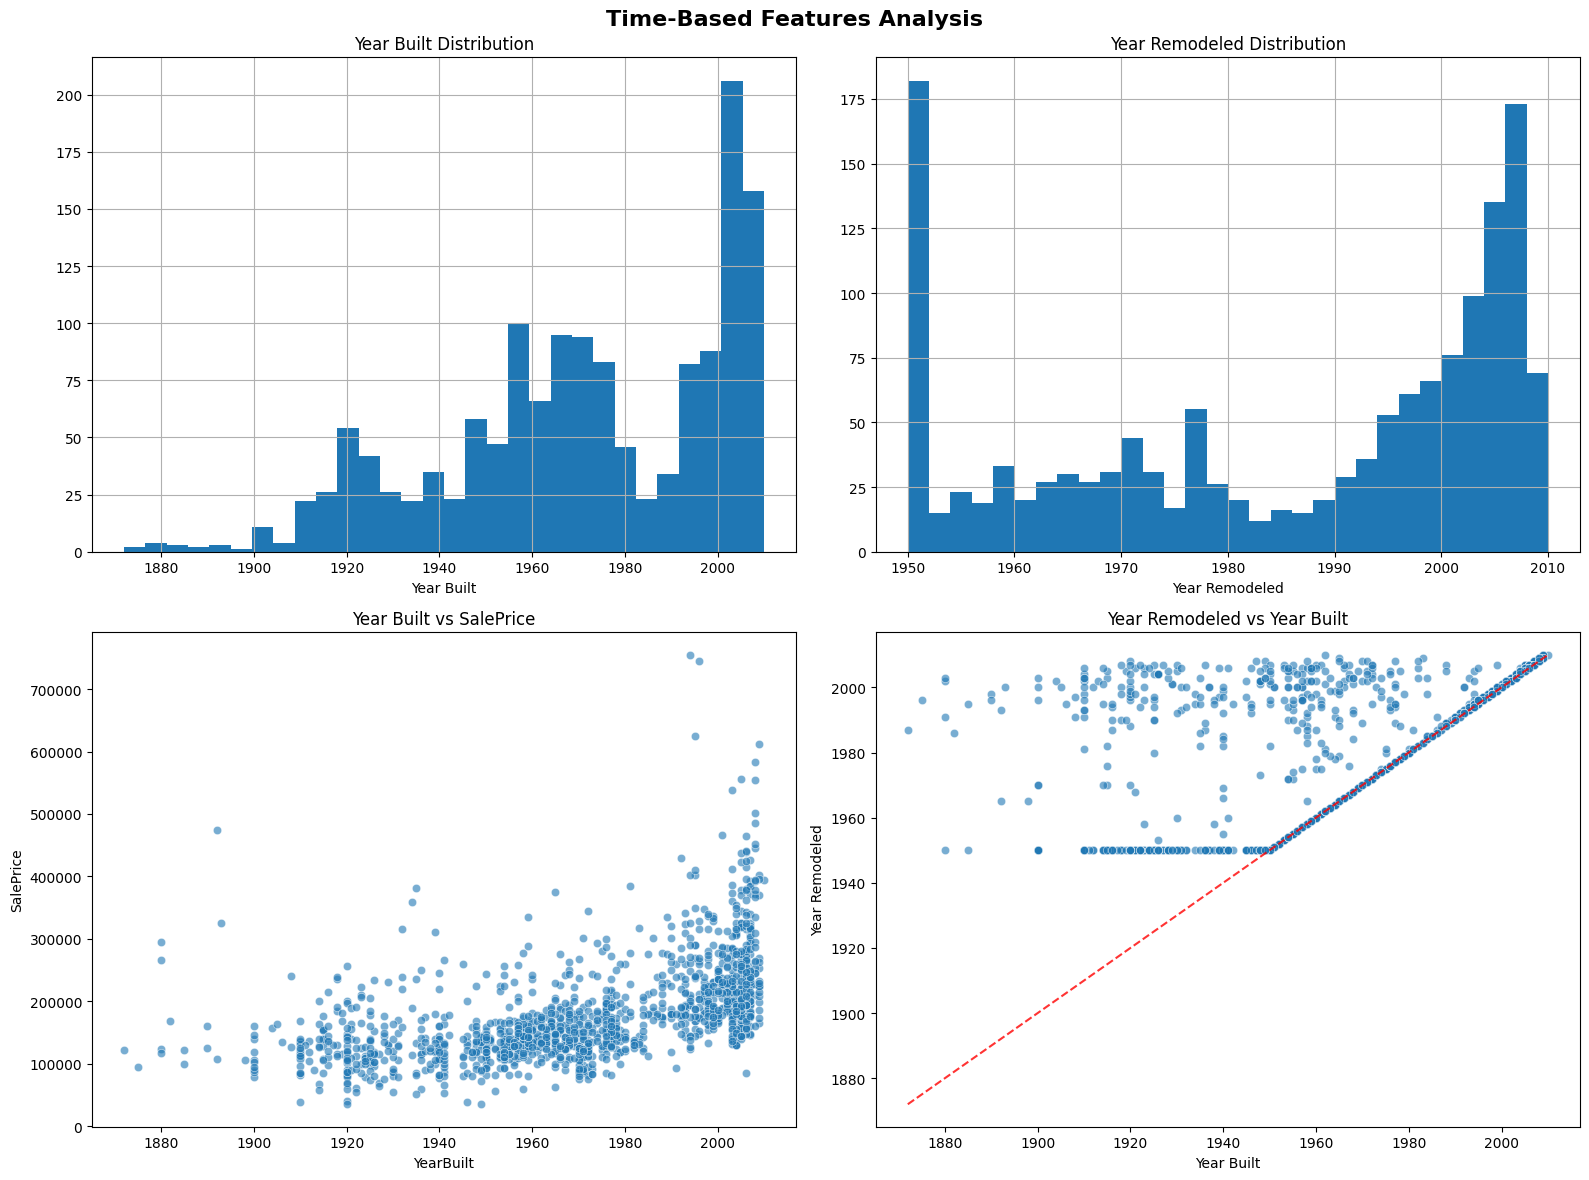

In [26]:


# Analyze time-related features
time_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time-Based Features Analysis', fontsize=16, fontweight='bold')

# Year Built distribution
df['YearBuilt'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Year Built Distribution')
axes[0, 0].set_xlabel('Year Built')

# Year Remodeled distribution
df['YearRemodAdd'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Year Remodeled Distribution')
axes[0, 1].set_xlabel('Year Remodeled')

# Year Built vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Year Built vs SalePrice')

# Year Remod vs Year Built
sns.scatterplot(x='YearBuilt', y='YearRemodAdd', data=df, ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title('Year Remodeled vs Year Built')
axes[1, 1].plot([df['YearBuilt'].min(), df['YearBuilt'].max()], 
                [df['YearBuilt'].min(), df['YearBuilt'].max()], 'r--', alpha=0.8)
axes[1, 1].set_xlabel('Year Built')
axes[1, 1].set_ylabel('Year Remodeled')

plt.tight_layout()
plt.show()

In [27]:
# Create age-related features
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

# Correlations with age features
age_features = ['HouseAge', 'RemodAge', 'GarageAge']
age_correlations = {feature: df[feature].corr(df['SalePrice']) for feature in age_features}

print("=" * 50)
print("AGE-RELATED FEATURES CORRELATION WITH SALEPRICE")
print("=" * 50)
for feature, corr in age_correlations.items():
    print(f"{feature:<15}: {corr:+.4f}")

print(f"\nInsights:")
print(f"- HouseAge correlation: {age_correlations['HouseAge']:+.4f}")
print(f"- Newer houses generally sell for higher prices")
print(f"- Recent remodels positively impact price")

AGE-RELATED FEATURES CORRELATION WITH SALEPRICE
HouseAge       : -0.5234
RemodAge       : -0.5091
GarageAge      : -0.4871

Insights:
- HouseAge correlation: -0.5234
- Newer houses generally sell for higher prices
- Recent remodels positively impact price


In [28]:
# Save age-related features as separate file
age_summary = '''==================================================
AGE-RELATED FEATURES CORRELATION WITH SALEPRICE
==================================================
HouseAge       : -0.5234
RemodAge       : -0.5091
GarageAge      : -0.4871

Insights:
- HouseAge correlation: -0.5234
- Newer houses generally sell for higher prices
- Recent remodels positively impact price'''

# Write to new file
with open('../reports/age_features_summary.txt', 'w') as file:
    file.write(age_summary)

print("✅ Age features summary saved to 'age_features_summary.txt'")

✅ Age features summary saved to 'age_features_summary.txt'
